# Chapter 1. Installation of Pytorch & Introduction of Graph

通过此节的实践内容，我们将

1. 首先学习程序运行环境的配置。
2. 图论的基础。
3. 接着学习PyG中图数据的表示及其使用，即学习PyG中Data类。
4. 最后学习PyG中图数据集的表示及其使用，即学习PyG中Dataset类。

## 1.1 Installation

Reference: https://medium.com/analytics-vidhya/how-to-install-tensorflow-cuda-toolkit-and-cudnn-on-windows-10-9efa075b448c#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjE5ZmUyYTdiNjc5NTIzOTYwNmNhMGE3NTA3OTRhN2JkOWZkOTU5NjEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2MjM4NTYwNDAsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwNTg1OTYyMDI2MDM2NzU2ODA4MyIsImVtYWlsIjoiZW5ncjEzMjAwQGdtYWlsLmNvbSIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJuYW1lIjoiSGFvcmFuIFpoYW5nIiwicGljdHVyZSI6Imh0dHBzOi8vbGgzLmdvb2dsZXVzZXJjb250ZW50LmNvbS9hLS9BT2gxNEdncmF0TjNGeHkzZlpsVTZEY2tNcE1TTUF5WGlReEVDZkwyOTJBMj1zOTYtYyIsImdpdmVuX25hbWUiOiJIYW9yYW4iLCJmYW1pbHlfbmFtZSI6IlpoYW5nIiwiaWF0IjoxNjIzODU2MzQwLCJleHAiOjE2MjM4NTk5NDAsImp0aSI6ImEwMDEwY2VjNjNlMTdjNWEyNWI4ZjQzNjVkZmIyZjlkOTlkOTVmNDQifQ.UEaBP9GBHpcjk8wA91CHjolg0iBgqHhdqKwzBrYAEB4yrlXSiO2GmGYtZXmrAgFQ4skihqu5rbS4OC-GQqgGCtq9_XcSe8J2SBNV03QoqLI9p31nBPwua9pUyZy1lwXKlbCQI25euyHaMUA0ZE1dhjJhtehlANYCCsZjFHr_gcl8YQer7AeoUfqi6Db6L_RGbIG21X9pJS0eFMw31OoVnoHC-SmDokC-9OYmx6VKg4ddqoSJrEx0wKKYD2C6MEfb8Aemgy96YzUucsYLh4Yua_3ozFc7Ekw29eEEIeF1g2VU97ldE57hqQO-3A3Pw5wUN6UFrBrcoCyhFWkUoqVV9A

    1.使用nvidia-smi命令查询显卡驱动是否正确安装

    2.安装正确版本的pytorch和cudatoolkit，此处安装1.8.1版本的pytorch和11.1版本的cudatoolkit
        print(torch.cuda.isavailable())
    
    3. 安装正确版本的PyG
        pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
        pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
        pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
        pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu111.html
        pip install torch-geometric

## 1.2 Fundamentals of Graph

### 1.2.1 图的定义

一个图被记为$\mathcal{G}$=$\mathcal{V}, \mathcal{E}$，其中 $\mathcal{V}$={${v_{1}, \ldots, v_{N}}$}是数量为$N=|\mathcal{V}|$ 的节点的集合， $\mathcal{E}$={${e_{1}, \ldots, e_{M}}$} 是数量为 $M$ 的边的集合。

图用节点表示实体（entities ），用边表示实体间的关系（relations）。

节点和边的信息可以是类别型的（categorical），类别型数据的取值只能是哪一类别。一般称类别型的信息为标签（label）。

节点和边的信息可以是数值型的（numeric），数值型数据的取值范围为实数。一般称数值型的信息为属性（attribute）。

在图的计算任务中，我们认为，节点一定含有信息（至少含有节点的度的信息），边可能含有信息。

### 1.2.2 图的邻接矩阵

给定一个图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$，其对应的邻接矩阵被记为$\mathbf{A} \in{0,1}^{N \times N}$。$\mathbf{A}_{i, j}=1$表示存在从节点$v_i$到$v_j$的边，反之表示不存在从节点$v_i$到$v_j$的边。

在无向图中，从节点$v_i$到$v_j$的边存在，意味着从节点$v_j$到$v_i$的边也存在。因而无向图的邻接矩阵是对称的。

在无权图中，各条边的权重被认为是等价的，即认为各条边的权重为$1$。

对于有权图，其对应的邻接矩阵通常被记为$\mathbf{W} \in{0,1}^{N \times N}$，其中$\mathbf{W}{i, j}=w{ij}$表示从节点$v_i$到$v_j$的边的权重。若边不存在时，边的权重为$0$。

无向无权图-例子：
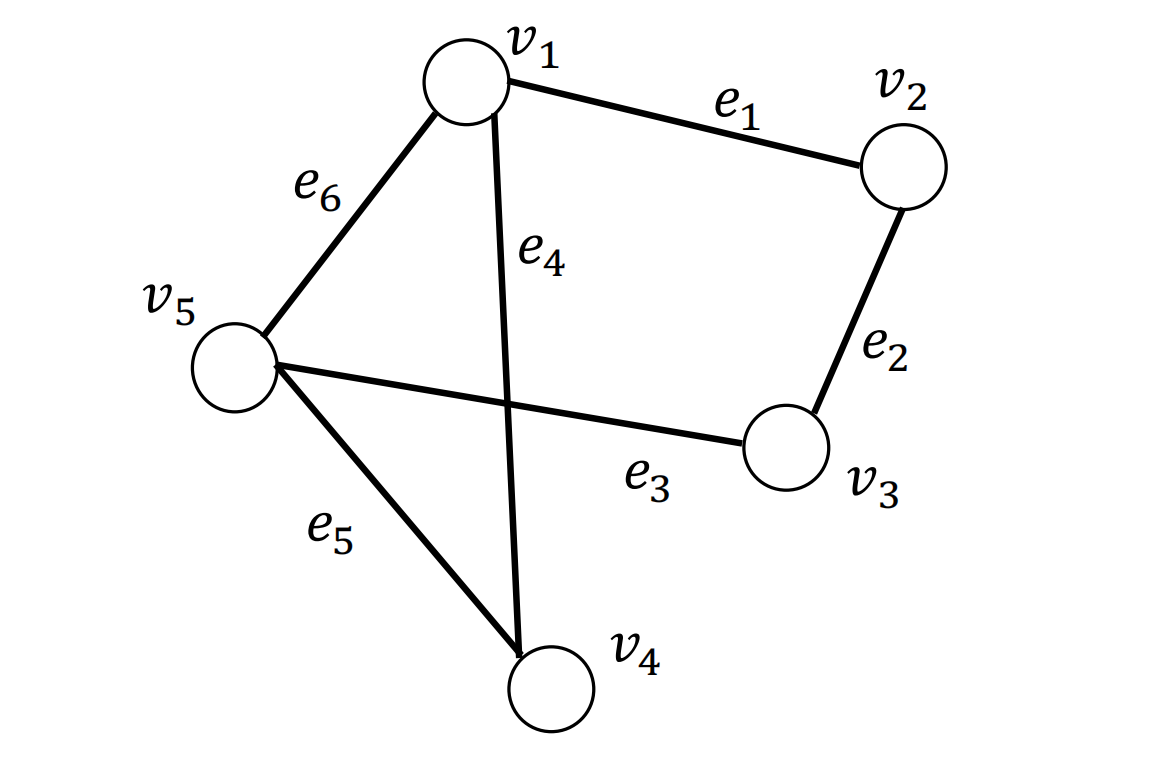

其邻接矩阵为： $$ \mathbf{A}=\left(\begin{array} {11111}0 & 1 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 0 \\ 0 & 1 & 0 & 0 & 1 \\ 1 & 0 & 0 & 0 & 1 \\ 1 & 0 & 1 & 1 & 0 \end{array}\right) $$

### 1.2.3 图的属性

**节点的度，degree**

1. 对于有向有权图，节点$v_i$的出度（out degree）等于从$v_i$出发的边的权重之和，节点$v_i$的入度（in degree）等于从连向$v_i$的边的权重之和。
2. 无向图是有向图的特殊情况，节点的出度与入度相等。
3. 无权图是有权图的特殊情况，各边的权重为$1$，那么节点$v_i$的出度（out degree）等于从$v_i$出发的边的数量，节点$v_i$的入度（in degree）等于从连向$v_i$的边的数量。
4. 节点$v_i$的度记为$d(v_i)$，入度记为$d_{in}(v_i)$，出度记为$d_{out}(v_i)$。

**邻接节点，neighbors**

1. 节点$v_i$的邻接节点为与节点$v_i$直接相连的节点，其被记为**$\mathcal{N(v_i)}$**。
2. **节点$v_i$的$k$跳远的邻接节点（neighbors with $k$-hop）**指的是到节点$v_i$要走$k$步的节点（一个节点的$2$跳远的邻接节点包含了自身）

**行走，walk**

1. $walk(v_1, v_2) = (v_1, e_6,e_5,e_4,e_1,v_2)$，这是一次“行走”，它是一次从节点$v_1$出发，依次经过边$e_6,e_5,e_4,e_1$，最终到达节点$v_2$的“行走”。
2. 下图所示为$walk(v_1, v_2) = (v_1, e_6,e_5,e_4,e_1,v_2)$，其中红色数字标识了边的访问序号。
在“行走”中，节点是允许重复的。

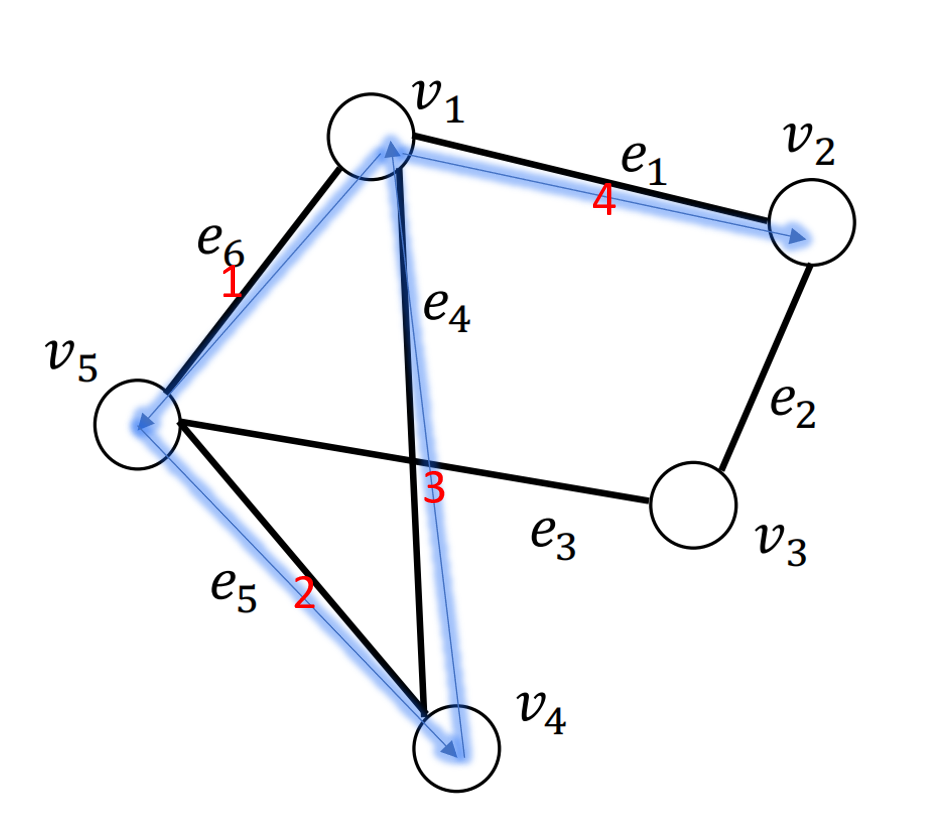

**邻接矩阵的N次**

有一图，其邻接矩阵为 $\mathbf{A}$, $\mathbf{A}^{n}$为邻接矩阵的$n$次方，那么$\mathbf{A}^{n}[i,j]$等于从节点$v_i$到节点$v_j$的长度为$n$的行走的个数。（也就是，以节点$v_i$为起点，节点$v_j$为终点，长度为$n$的节点访问方案的数量，节点访问中可以兜圈子重复访问一些节点）

**路径，path**

“路径”是节点不可重复的“行走”

**子图，subgraph**

有一图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$，另有一图$\mathcal{G}^{\prime}={\mathcal{V}^{\prime}, \mathcal{E}^{\prime}}$，其中$\mathcal{V}^{\prime} \in \mathcal{V}$，$\mathcal{E}^{\prime} \in \mathcal{E}$并且$\mathcal{V}^{\prime}$不包含$\mathcal{E}^{\prime}$中未出现过的节点，那么$\mathcal{G}^{\prime}$是$\mathcal{G}$的子图。

**连通分量，connected component**

给定图$\mathcal{G}^{\prime}={\mathcal{V}^{\prime}, \mathcal{E}^{\prime}}$是图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$的子图。记属于图$\mathcal{G}$但不属于$\mathcal{G}^{\prime}$图的节点集合记为$\mathcal{V}/\mathcal{V}^{\prime}$ 。如果属于$\mathcal{V}^{\prime}$的任意节点对之间存在至少一条路径，但不存在一条边连接属于$\mathcal{V}^{\prime}$的节点与属于$\mathcal{V}/\mathcal{V}^{\prime}$的节点，那么图$\mathcal{G}^{\prime}$是图$\mathcal{G}$的连通分量。

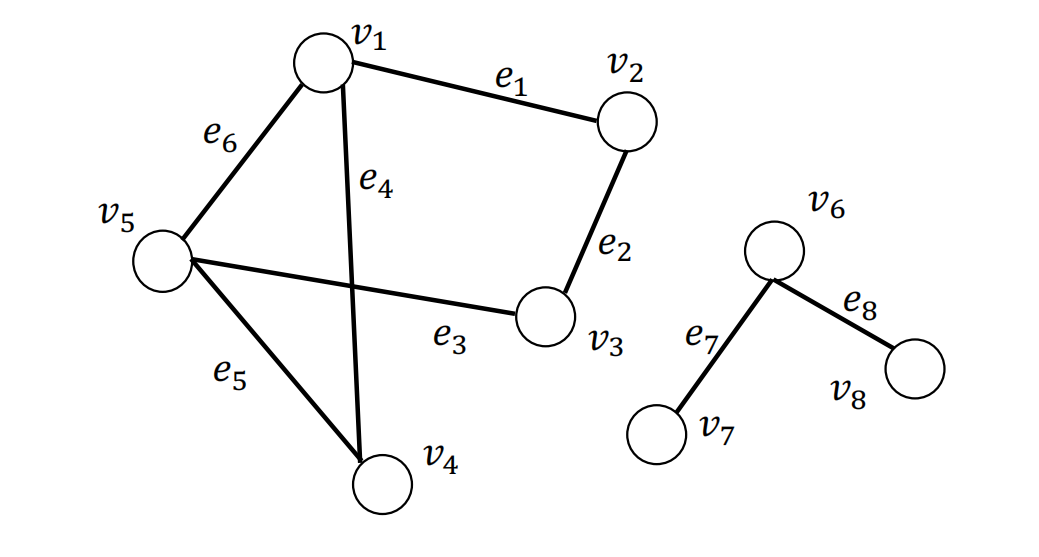

左右两边子图都是整图的**连通分量**。

**连通图，connected graph**

当一个图只包含一个连通分量，即其自身，那么该图是一个连通图。

**最短路径，shortest path**

$v_{s}, v_{t} \in \mathcal{V}$ 是图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$上的一对节点，节点对$v_{s}, v_{t} \in \mathcal{V}$之间所有路径的集合记为$\mathcal{P}{\mathrm{st}}$。节点对$v{s}, v_{t}$之间的最短路径$p_{\mathrm{s} t}^{\mathrm{sp}}$为$\mathcal{P}{\mathrm{st}}$中长度最短的一条路径，其形式化定义为 $$ p{\mathrm{s} t}^{\mathrm{sp}}=\arg \min {p \in \mathcal{P}{\mathrm{st}}}|p| $$ 其中，$p$表示$\mathcal{P}_{\mathrm{st}}$中的一条路径，$|p|$是路径$p$的长度。

**直径，diameter**

给定一个连通图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$，其直径为其所有节点对之间的最短路径的最大值，形式化定义为
$$ \operatorname{diameter}(\mathcal{G})=\max {v{s}, v_{t} \in \mathcal{V}} \min {p \in \mathcal{P}{s t}}|p| $$

**拉普拉斯矩阵，Laplacian Matrix**

给定一个图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$，其邻接矩阵为$A$，其拉普拉斯矩阵定义为$\mathbf{L=D-A}$，其中$\mathbf{D=diag(d(v_1), \cdots, d(v_N))}$。

**L: 度矩阵**

把W的每一列元素加起来得到N个数，然后把它们放在对角线上（其它地方都是零），组成一个N×N的对角矩阵，记为度矩阵D

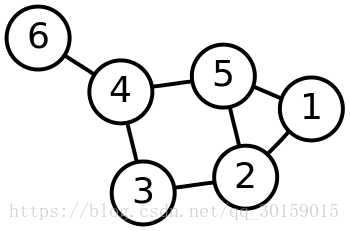

A矩阵:
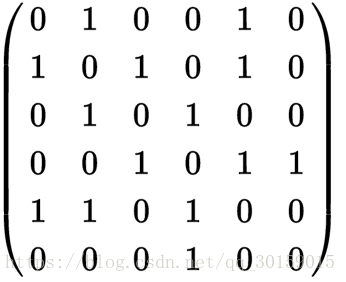

D矩阵:
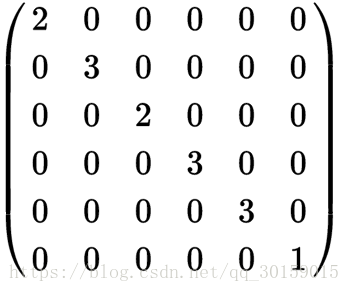

**对称归一化的拉普拉斯矩阵，Symmetric normalized Laplacian**

给定一个图$\mathcal{G}={\mathcal{V}, \mathcal{E}}$，其邻接矩阵为$A$，其规范化的拉普拉斯矩阵定义为
$$ \mathbf{L=D^{-\frac{1}{2}}(D-A)D^{-\frac{1}{2}}=I-D^{-\frac{1}{2}}AD^{-\frac{1}{2}}} $$

### 1.2.4 图的种类

**同质图（Homogeneous Graph）**：只有一种类型的节点和一种类型的边的图。

**异质图（Heterogeneous Graph）**：存在多种类型的节点和多种类型的边的图。

**二部图（Bipartite Graphs）**：节点分为两类，只有不同类的节点之间存在边。

### 1.2.5 图结构数据上的机器学习

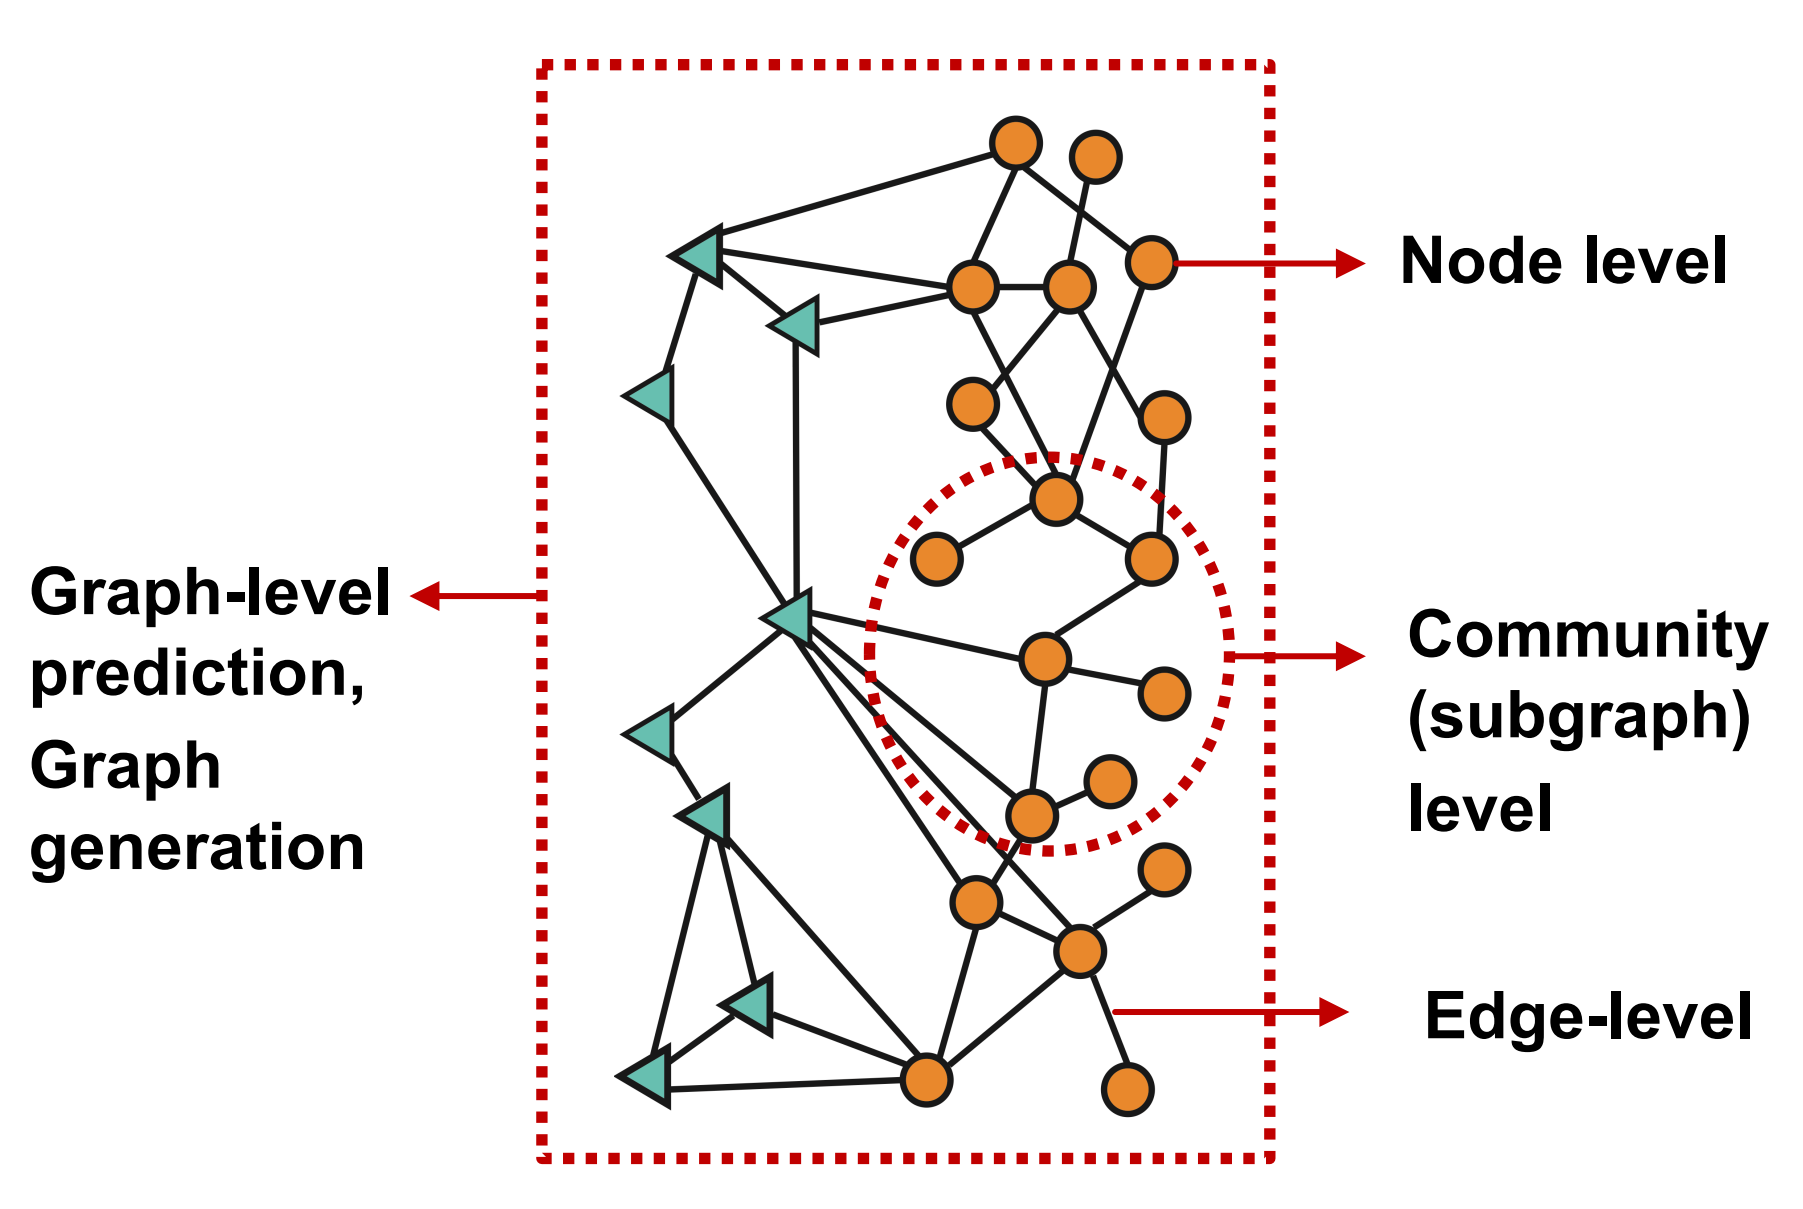

1. 节点预测：预测节点的类别或某类属性的取值
        i. 例子：对是否是潜在客户分类、对游戏玩家的消费能力做预测
2. 边预测：预测两个节点间是否存在链接
        i. 例子：Knowledge graph completion、好友推荐、商品推荐
3. 图的预测：对不同的图进行分类或预测图的属性
        i. 例子：分子属性预测
4. 节点聚类：检测节点是否形成一个社区
        i. 例子：社交圈检测
5. 其他任务
        i. 图生成：例如药物发现
        ii. 图演变：例如物理模拟
        iii. ……

**不同于矩阵、张量、序列（sequence）和时间序列（time series），它们都是规则的结构化的数据；
图数据是非规则的非结构化的，它具有以下的特点：**
1. 任意的大小和复杂的拓扑结构；
2. 没有固定的节点排序或参考点；
3. 通常是动态的，并具有多模态的特征；
4. 图的信息并非只蕴含在节点信息和边的信息中，图的信息还包括了图的拓扑结构。

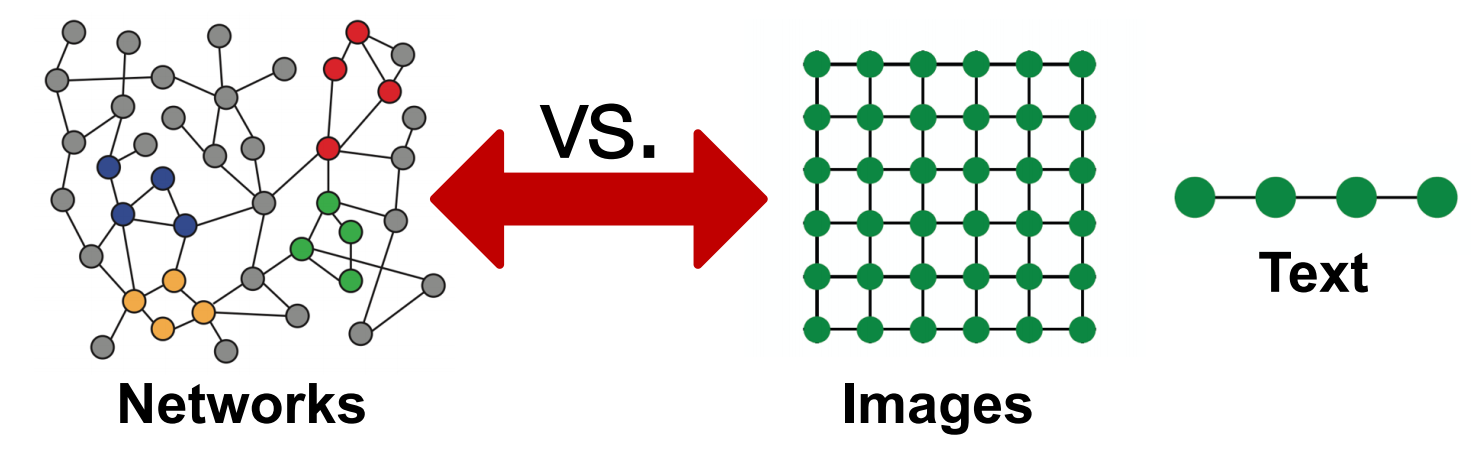

**以往的深度学习技术是为规则且结构化的数据设计的，无法直接用于图数据。应用于图数据的神经网络，要求**

1. 适用于不同度的节点；
2. 节点表征的计算与邻接节点的排序无关；
3. 不但能够根据节点信息、邻接节点的信息和边的信息计算节点表征，还能根据图拓扑结构计算节点表征

## 1.3 Introduction of pyG

**PyTorch Geometric**(PyG)是面向几何深度学习的PyTorch的扩展库，几何深度学习指的是应用于图和其他不规则、非结构化数据的深度学习。基于PyG库，我们可以轻松地根据数据生成一个图对象，然后很方便的使用它；我们也可以容易地为一个图数据集构造一个数据集类，然后很方便的将它用于神经网络。

### 1.3.1 Data类——PyG中图的表示及其使用

**Data类的构造函数**

In [8]:
class Data(object):
    def __init__(self, x=None, edge_index=None, edge_attr=None, y=None, **kwargs):
        '''
        Args:
            x (Tensor, optional): 节点属性矩阵，大小为`[num_nodes, num_node_features]`
            edge_index (LongTensor, optional): 边索引矩阵，大小为`[2, num_edges]`，第0行为尾节点，第1行为头节点，头指向尾
            edge_attr (Tensor, optional): 边属性矩阵，大小为`[num_edges, num_edge_features]`
            y (Tensor, optional): 节点或图的标签，任意大小（，其实也可以是边的标签）
        '''
        self.x = x
        self.edge_index = edge_index
        self.edge_attr = edge_attr
        self.y = y

        for key, item in kwargs.items():
            if key == 'num_nodes':
                self.__num_nodes__ = item
            else:
                self[key] = item

**edge_index**的每一列定义一条边，其中第一行为边起始节点的索引，第二行为边结束节点的索引。

这种表示方法被称为COO格式（coordinate format），通常用于表示稀疏矩阵。PyG不是用稠密矩阵$\mathbf{A} \in { 0, 1 }^{|\mathcal{V}| \times |\mathcal{V}|}$来持有邻接矩阵的信息，而是用仅存储邻接矩阵$\mathbf{A}$中非$0$元素的稀疏矩阵来表示图。

通常，一个图至少包含x, edge_index, edge_attr, y, num_nodes5个属性，当图包含其他属性时，我们可以通过指定额外的参数使Data对象包含其他的属性：

**torch-1.9.0正在下载中，程序环境设定出现问题**

In [21]:
import torch_geometric

OSError: [WinError 127] 找不到指定的程序。

In [12]:
x=1
edge_index=1
edge_attr=1
y=1
num_nodes=1
graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y, num_nodes=num_nodes)

**我们也可以将一个dict对象转换为一个Data对象：**

In [14]:
graph_dict = {
    'x': x,
    'edge_index': edge_index,
    'edge_attr': edge_attr,
    'y': y,
    'num_nodes': num_nodes,
    'other_attr': None
}
graph_data = Data.from_dict(graph_dict)

AttributeError: type object 'Data' has no attribute 'from_dict'